## S-Mobile: Predicting Customer Churn
* Team-lead GitLab id:
* Group name:
* Team member names:

## Setup

Please complete this Jupyter notebook by answering the questions in `s-mobile.pdf` on Canvas (week9/). Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML from the Jupyter Notebook file without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the fourth group assignment for MGTA 455 and you will be using git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". git will not decide for you who's change to accept so the team-lead will have to determine which edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [5]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_pickle("data/s_mobile.pkl")
s_mobile["churn_yes"] = (s_mobile["churn"] == "yes").astype(int)

If you want access to the full 5M row dataset, use the dropbox link below.

https://www.dropbox.com/s/eli6a1q6qisacci/s_mobile_1M.pkl?dl=1

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [6]:
# show dataset description
rsm.describe(s_mobile)

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


Use `smf.glm` with `freq_weights` and `cov_type` like in the below example
    
```python
lr = smf.glm(
    formula="churn_yes ~ changer + changem + ...",
    family=Binomial(link=logit()),
    data=pentathlon_nptb.query("training == 1"),
    freq_weights=s_mobile.loc[mobile.training == 1, "cweight"],
).fit(cov_type="HC1")
```

In [7]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

     index     OR   OR%  2.5%  97.5% p.values    
1  changer  1.001  0.1%   1.0  1.002    0.006  **


In [8]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Question answers

## Question 1

### Exploratory Data Analysis

Descriptive statistics in the training data

In [9]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.258950,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.263480,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.192970,0.0,32.0


Churn in the representative sample

In [10]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.310567,28.496320,-90.0,437.0
changem,17.254533,51.375390,-78.0,540.0
revenue,56.634800,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.723400,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.296400,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [11]:
s_mobile["churn_yes"] = (s_mobile["churn"] == "yes").astype(int)

In [12]:
class_weight_dict = {0: 49, 1: 1}
s_mobile["cweight"] = rsm.ifelse(s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0])

#### Histograms of the variables

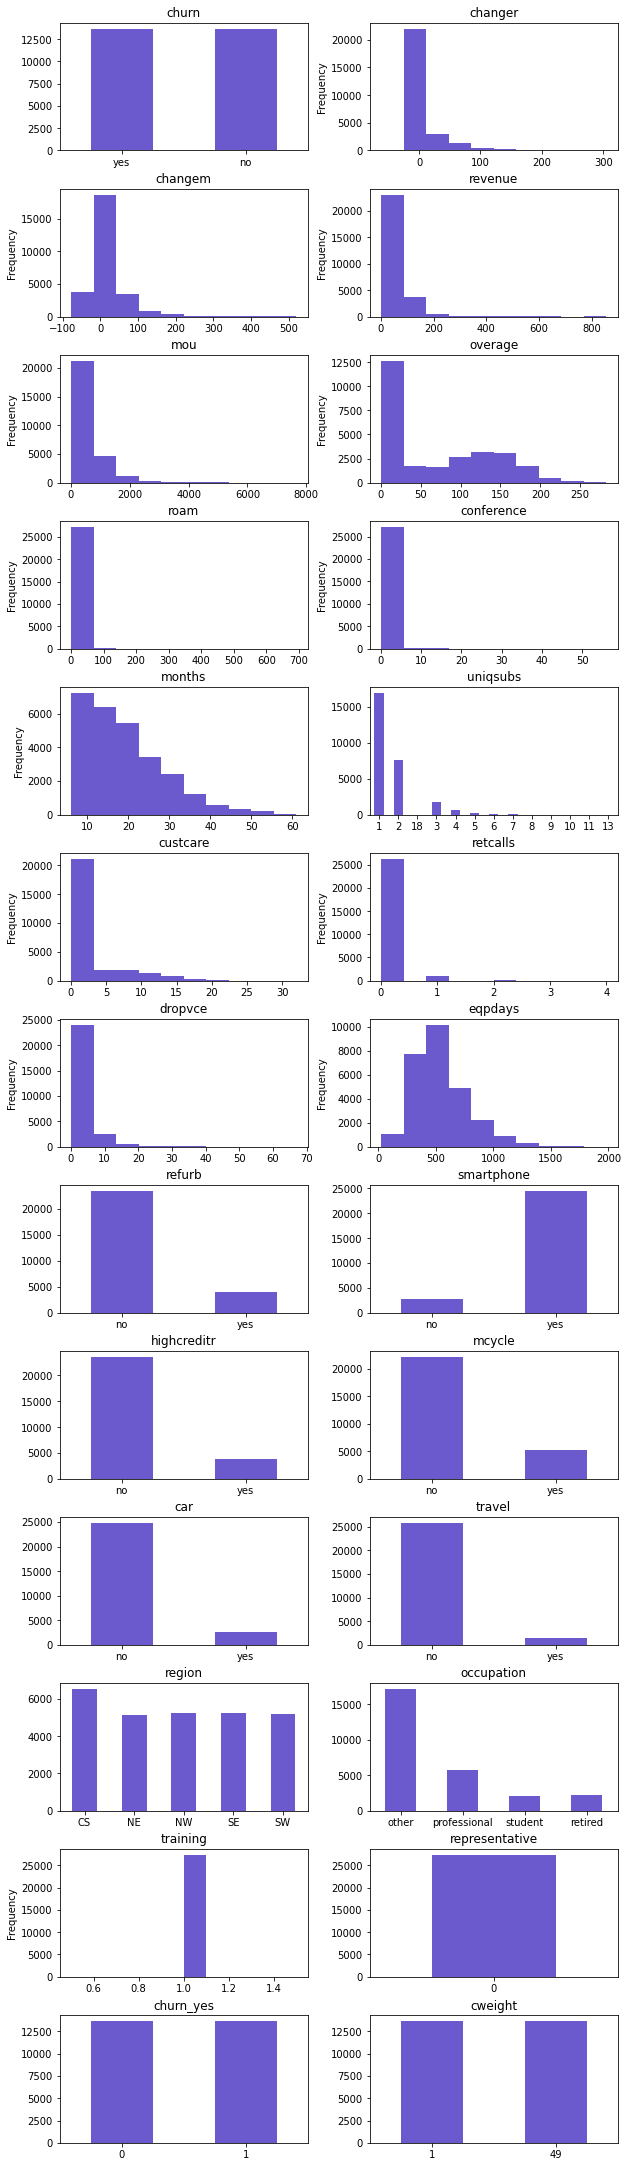

In [13]:
rsm.distr_plot(s_mobile.query('training == 1').drop(columns='customer'))

#### Checking the impact of each variable on churn

In [14]:
ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','refurb')
ct.summary()


Cross-tabs
Variables: churn_yes, refurb
Null hyp: there is no association between churn_yes and refurb
Alt. hyp: there is an association between churn_yes and refurb

Observed:

refurb         no    yes   Total
churn_yes                       
0          11,821  1,829  13,650
1          11,558  2,092  13,650
Total      23,379  3,921  27,300

Expected: (row total x column total) / total

refurb           no      yes     Total
churn_yes                             
0          11,689.5  1,960.5  13,650.0
1          11,689.5  1,960.5  13,650.0
Total      23,379.0  3,921.0  27,300.0

Chi-squared: 20.6 df(1), p.value 0.0



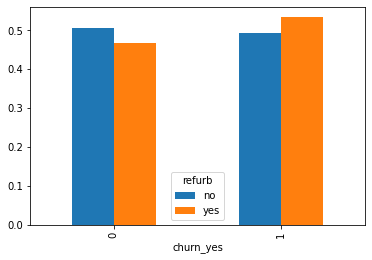

In [15]:
ct.plot()

In [16]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','smartphone')
ct.summary()


Cross-tabs
Variables: churn_yes, smartphone
Null hyp: there is no association between churn_yes and smartphone
Alt. hyp: there is an association between churn_yes and smartphone

Observed:

smartphone     no     yes   Total
churn_yes                        
0           1,161  12,489  13,650
1           1,653  11,997  13,650
Total       2,814  24,486  27,300

Expected: (row total x column total) / total

smartphone       no       yes     Total
churn_yes                              
0           1,407.0  12,243.0  13,650.0
1           1,407.0  12,243.0  13,650.0
Total       2,814.0  24,486.0  27,300.0

Chi-squared: 95.91 df(1), p.value 0.0



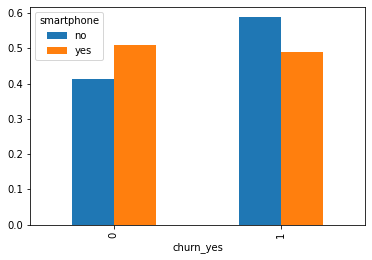

In [17]:
ct.plot()

In [18]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','highcreditr')
ct.summary()


Cross-tabs
Variables: churn_yes, highcreditr
Null hyp: there is no association between churn_yes and highcreditr
Alt. hyp: there is an association between churn_yes and highcreditr

Observed:

highcreditr      no    yes   Total
churn_yes                         
0            11,169  2,481  13,650
1            12,394  1,256  13,650
Total        23,563  3,737  27,300

Expected: (row total x column total) / total

highcreditr        no      yes     Total
churn_yes                               
0            11,781.5  1,868.5  13,650.0
1            11,781.5  1,868.5  13,650.0
Total        23,563.0  3,737.0  27,300.0

Chi-squared: 465.24 df(1), p.value 0.0



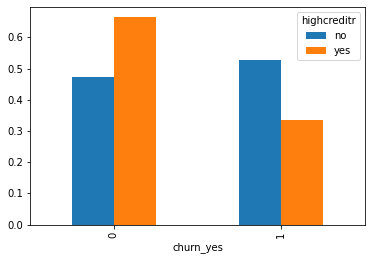

In [19]:
ct.plot()

In [20]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','mcycle')
ct.summary()


Cross-tabs
Variables: churn_yes, mcycle
Null hyp: there is no association between churn_yes and mcycle
Alt. hyp: there is an association between churn_yes and mcycle

Observed:

mcycle         no    yes   Total
churn_yes                       
0          11,085  2,565  13,650
1          11,077  2,573  13,650
Total      22,162  5,138  27,300

Expected: (row total x column total) / total

mcycle           no      yes     Total
churn_yes                             
0          11,081.0  2,569.0  13,650.0
1          11,081.0  2,569.0  13,650.0
Total      22,162.0  5,138.0  27,300.0

Chi-squared: 0.02 df(1), p.value 0.9



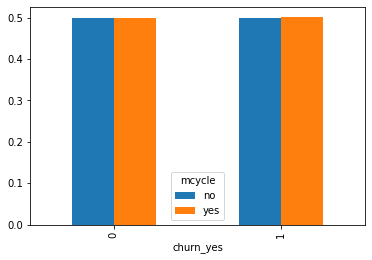

In [21]:
ct.plot()

In [22]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','car')
ct.summary()


Cross-tabs
Variables: churn_yes, car
Null hyp: there is no association between churn_yes and car
Alt. hyp: there is an association between churn_yes and car

Observed:

car            no    yes   Total
churn_yes                       
0          12,411  1,239  13,650
1          12,376  1,274  13,650
Total      24,787  2,513  27,300

Expected: (row total x column total) / total

car              no      yes     Total
churn_yes                             
0          12,393.5  1,256.5  13,650.0
1          12,393.5  1,256.5  13,650.0
Total      24,787.0  2,513.0  27,300.0

Chi-squared: 0.54 df(1), p.value 0.46



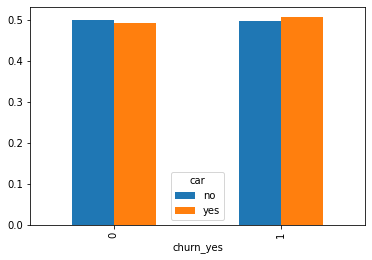

In [23]:
ct.plot()

In [24]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','travel')
ct.summary()


Cross-tabs
Variables: churn_yes, travel
Null hyp: there is no association between churn_yes and travel
Alt. hyp: there is an association between churn_yes and travel

Observed:

travel         no    yes   Total
churn_yes                       
0          12,877    773  13,650
1          12,900    750  13,650
Total      25,777  1,523  27,300

Expected: (row total x column total) / total

travel           no      yes     Total
churn_yes                             
0          12,888.5    761.5  13,650.0
1          12,888.5    761.5  13,650.0
Total      25,777.0  1,523.0  27,300.0

Chi-squared: 0.37 df(1), p.value 0.54



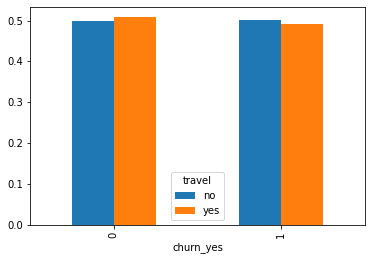

In [25]:
ct.plot()

In [26]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','region')
ct.summary()


Cross-tabs
Variables: churn_yes, region
Null hyp: there is no association between churn_yes and region
Alt. hyp: there is an association between churn_yes and region

Observed:

region        CS     NE     NW     SE     SW   Total
churn_yes                                           
0          2,724  2,719  2,723  2,722  2,762  13,650
1          3,803  2,421  2,498  2,504  2,424  13,650
Total      6,527  5,140  5,221  5,226  5,186  27,300

Expected: (row total x column total) / total

region          CS       NE       NW       SE       SW     Total
churn_yes                                                       
0          3,263.5  2,570.0  2,610.5  2,613.0  2,593.0  13,650.0
1          3,263.5  2,570.0  2,610.5  2,613.0  2,593.0  13,650.0
Total      6,527.0  5,140.0  5,221.0  5,226.0  5,186.0  27,300.0

Chi-squared: 236.47 df(4), p.value 0.0



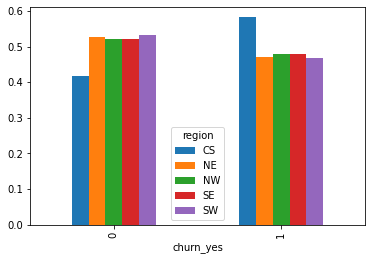

In [27]:
ct.plot()

In [28]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'churn_yes','occupation')
ct.summary()


Cross-tabs
Variables: churn_yes, occupation
Null hyp: there is no association between churn_yes and occupation
Alt. hyp: there is an association between churn_yes and occupation

Observed:

occupation   other professional student retired   Total
churn_yes                                              
0            8,650        2,359     734   1,907  13,650
1            8,509        3,431   1,345     365  13,650
Total       17,159        5,790   2,079   2,272  27,300

Expected: (row total x column total) / total

occupation     other professional  student  retired     Total
churn_yes                                                    
0            8,579.5      2,895.0  1,039.5  1,136.0  13,650.0
1            8,579.5      2,895.0  1,039.5  1,136.0  13,650.0
Total       17,159.0      5,790.0  2,079.0  2,272.0  27,300.0

Chi-squared: 1425.75 df(3), p.value 0.0



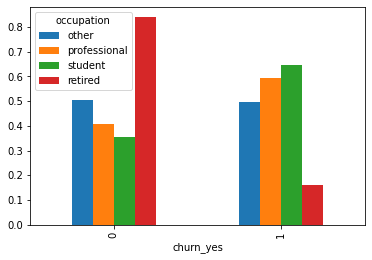

In [29]:
ct.plot()

In [30]:
reg = smf.ols('churn_yes~changer',data=s_mobile.query('training == 1')).fit()

In [31]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,changer,0.0,0.0,0.0,0.006,**


In [32]:
reg = smf.ols('churn_yes~changem',data=s_mobile.query('training == 1')).fit()

In [33]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,changem,-0.0,-0.0,-0.0,< .001,***


In [34]:
reg = smf.ols('churn_yes~revenue',data=s_mobile.query('training == 1')).fit()

In [35]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,revenue,0.0,-0.0,0.0,0.144,


In [36]:
reg = smf.ols('churn_yes~mou',data=s_mobile.query('training == 1')).fit()

In [37]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,mou,-0.0,-0.0,-0.0,< .001,***


In [38]:
reg = smf.ols('churn_yes~overage',data=s_mobile.query('training == 1')).fit()

In [39]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,overage,0.001,0.0,0.001,< .001,***


In [40]:
reg = smf.ols('churn_yes~roam',data=s_mobile.query('training == 1')).fit()

In [41]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,roam,0.001,0.0,0.002,0.002,**


In [42]:
reg = smf.ols('churn_yes~conference',data=s_mobile.query('training == 1')).fit()

In [43]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,conference,-0.011,-0.017,-0.006,< .001,***


In [44]:
reg = smf.ols('churn_yes~months',data=s_mobile.query('training == 1')).fit()

In [45]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,months,0.001,0.001,0.002,< .001,***


In [46]:
reg = smf.ols('churn_yes~uniqsubs',data=s_mobile.query('training == 1')).fit()

In [47]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,uniqsubs,0.016,0.01,0.023,< .001,***


In [48]:
reg = smf.ols('churn_yes~custcare',data=s_mobile.query('training == 1')).fit()

In [49]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,custcare,-0.006,-0.008,-0.005,< .001,***


In [50]:
reg = smf.ols('churn_yes~retcalls',data=s_mobile.query('training == 1')).fit()

In [51]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,retcalls,0.141,0.115,0.168,< .001,***


In [52]:
reg = smf.ols('churn_yes~dropvce',data=s_mobile.query('training == 1')).fit()

In [53]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,dropvce,-0.002,-0.004,-0.001,< .001,***


In [54]:
reg = smf.ols('churn_yes~eqpdays',data=s_mobile.query('training == 1')).fit()

In [55]:
rsm.coef_ci(reg)

,index,coefficient,2.5%,97.5%,p.values,
1,eqpdays,0.0,0.0,0.0,< .001,***


#### Correlations

In [56]:
num_vars = list(s_mobile.dtypes[(s_mobile.dtypes != 'category') & (s_mobile.dtypes != 'object')].reset_index()['index'])[:13]

cor = rsm.correlation(s_mobile.query('training == 1').loc[:,num_vars])
cor.summary()

Correlation
Variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
           changer changem revenue    mou overage   roam conference months  \
changem       0.43                                                           
revenue       0.12   -0.01                                                   
mou           0.08   -0.06     0.7                                           
overage       0.23    0.02    0.57   0.53                                    
roam          0.03    -0.0    0.27   0.12    0.06                            
conference    0.04   -0.01    0.24   0.33    0.16   0.04                     
months       -0.04   -0.01   -0.02  -0.08   -0.03  -0.02      -0.06          
uniqsubs      -0.0    -0.0   -0.02  -0.04   -0.02  -0.01      -0.02   0.01   
custcare      0.01   -0.05    0.24   0.47    0.2

## Logistic Regression

In [57]:
# Standardising the numerics

Xs = rsm.scale_df(
    s_mobile.loc[:, 'changer':'occupation'],
    wt=s_mobile.cweight,
    train=s_mobile.training == 1,
)
Xs["churn_yes"] = s_mobile.churn_yes
Xs

,changer,changem,revenue,mou,overage,roam,conference,months,uniqsubs,custcare,...,eqpdays,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,churn_yes
0,1.795996,0.648059,0.059201,0.051482,0.583946,-0.090861,-0.126390,-0.534447,-0.299926,-0.285786,...,-0.272399,no,yes,no,no,no,no,CS,other,1
1,-0.146109,-0.134122,-0.032648,-0.364217,-0.453367,-0.090861,-0.126390,-0.534447,0.275305,-0.285786,...,-0.288119,no,yes,yes,no,no,no,SE,other,0
2,-0.146109,-0.254458,-0.204864,0.562407,0.252889,-0.090861,0.310452,-0.483883,-0.299926,1.891054,...,-0.602518,no,yes,no,yes,no,yes,NW,professional,0
3,-0.146109,-0.244430,-0.250789,0.014857,-0.453367,-0.090861,-0.126390,0.931900,-0.299926,-0.285786,...,0.172251,no,yes,yes,yes,no,no,NW,retired,0
4,-0.181744,-0.244430,0.495484,1.230822,0.370598,0.675463,-0.126390,0.072318,0.850537,-0.056645,...,-0.299347,no,yes,no,yes,yes,no,SW,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,-0.146109,-0.314625,-0.273751,-0.453034,-0.453367,-0.090861,-0.126390,0.021754,-0.299926,-0.285786,...,0.399067,no,yes,no,yes,yes,no,SW,other,0
68996,-0.146109,0.788450,-0.308194,-0.426480,-0.453367,-0.090861,-0.126390,-0.028810,0.275305,-0.285786,...,0.354153,no,no,no,yes,yes,no,SE,other,0
68997,-0.146109,-0.114066,-0.158940,-0.268991,-0.063455,-0.090861,-0.126390,0.325136,0.275305,-0.285786,...,0.789820,no,no,no,no,no,no,CS,student,1
68998,-0.199561,-0.455017,-0.181902,-0.234197,-0.453367,-0.090861,-0.126390,0.021754,-0.299926,-0.285786,...,0.372119,no,yes,no,no,no,no,CS,other,1


#### Initial Model

In [58]:
evar = list(pd.Series(Xs.columns)[:-1])

In [59]:
form = "churn_yes ~ " + " + ".join(evar)

In [60]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=Xs[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%,p.values,
1,refurb[T.yes],1.318,31.8%,1.255,1.385,< .001,***
2,smartphone[T.yes],0.913,-8.7%,0.860,0.969,0.003,**
3,highcreditr[T.yes],0.483,-51.7%,0.455,0.513,< .001,***
4,mcycle[T.yes],0.883,-11.7%,0.834,0.934,< .001,***
5,car[T.yes],0.991,-0.9%,0.919,1.068,0.809,
6,travel[T.yes],0.781,-21.9%,0.723,0.844,< .001,***
7,region[T.NE],0.644,-35.6%,0.611,0.678,< .001,***
8,region[T.NW],0.660,-34.0%,0.627,0.695,< .001,***
9,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***
10,region[T.SW],0.627,-37.3%,0.595,0.660,< .001,***


In [61]:
rsm.model_fit(lr)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Log-likelihood: -63795.467, AIC: 127644.935, BIC: 127953.64
Chi-squared: 691107.451 df(26), p.value < 0.001 
Nr obs: 27,300



In [62]:
lr.wald_test_terms().table.round(3)

,statistic,pvalue,df_constraint
Intercept,10416.621,0.000,1
refurb,121.728,0.000,1
smartphone,8.950,0.003,1
highcreditr,559.722,0.000,1
mcycle,18.519,0.000,1
car,0.058,0.809,1
travel,38.734,0.000,1
region,506.107,0.000,4
occupation,1693.227,0.000,3
changer,11.976,0.001,1


In [63]:
rsm.vif(lr_b)

,variable,vif,Rsq
0,mou,3.139,0.681
1,revenue,2.541,0.606
2,eqpdays,1.677,0.404
3,mcycle[T.yes],1.672,0.402
4,dropvce,1.667,0.400
5,overage,1.653,0.395
6,car[T.yes],1.650,0.394
7,region[T.NW],1.458,0.314
8,region[T.SE],1.457,0.314
9,region[T.SW],1.456,0.313


In [ ]:
- In the model

#### Final Model

In [54]:
evar = list(pd.Series(Xs.columns)[:-1])
evar.remove('car')
evar.remove('revenue')
evar.remove('conference')

In [55]:
form = "churn_yes ~ " + " + ".join(evar)

In [56]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=Xs[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%,p.values,
1,refurb[T.yes],1.319,31.9%,1.256,1.385,< .001,***
2,smartphone[T.yes],0.913,-8.7%,0.860,0.969,0.003,**
3,highcreditr[T.yes],0.483,-51.7%,0.454,0.513,< .001,***
4,mcycle[T.yes],0.880,-12.0%,0.841,0.920,< .001,***
5,travel[T.yes],0.781,-21.9%,0.723,0.844,< .001,***
6,region[T.NE],0.645,-35.5%,0.612,0.679,< .001,***
7,region[T.NW],0.661,-33.9%,0.627,0.695,< .001,***
8,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***
9,region[T.SW],0.627,-37.3%,0.596,0.661,< .001,***
10,occupation[T.professional],1.415,41.5%,1.354,1.479,< .001,***


In [57]:
rsm.model_fit(lr)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Log-likelihood: -63798.075, AIC: 127644.15, BIC: 127918.554
Chi-squared: 690912.889 df(23), p.value < 0.001 
Nr obs: 27,300



In [58]:
lr.wald_test_terms().table.round(3)

,statistic,pvalue,df_constraint
Intercept,10453.691,0.000,1
refurb,122.230,0.000,1
smartphone,8.915,0.003,1
highcreditr,562.438,0.000,1
mcycle,31.349,0.000,1
travel,38.790,0.000,1
region,505.305,0.000,4
occupation,1701.675,0.000,3
changer,11.988,0.001,1
changem,40.330,0.000,1


In [59]:
rsm.vif(lr_b)

,variable,vif,Rsq
0,mou,2.284,0.562
1,eqpdays,1.674,0.402
2,dropvce,1.638,0.389
3,overage,1.473,0.321
4,region[T.NW],1.458,0.314
5,region[T.SE],1.457,0.314
6,region[T.SW],1.455,0.313
7,region[T.NE],1.453,0.312
8,months,1.362,0.266
9,custcare,1.361,0.265


In [60]:
score = roc_auc_score(s_mobile.query('training==1')['churn_yes'],lr.predict(Xs[s_mobile.training == 1]))

print(f'Train data auc is {score}')

Train data auc is 0.6879414778140053


In [61]:
score = roc_auc_score(s_mobile.query('training==0')['churn_yes'],lr.predict(Xs[s_mobile.training == 0]))

print(f'Test data auc is {score}')

Test data auc is 0.6945277814303455


In [62]:
# Comparing gains on train and test

In [63]:
df_train = pd.DataFrame({'churn_yes':s_mobile.query('training==1')['churn_yes'],'predictions':lr.predict(Xs[s_mobile.training == 1])})
df_test = pd.DataFrame({'churn_yes':s_mobile.query('training==0')['churn_yes'],'predictions':lr.predict(Xs[s_mobile.training == 0])})

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative gains'>

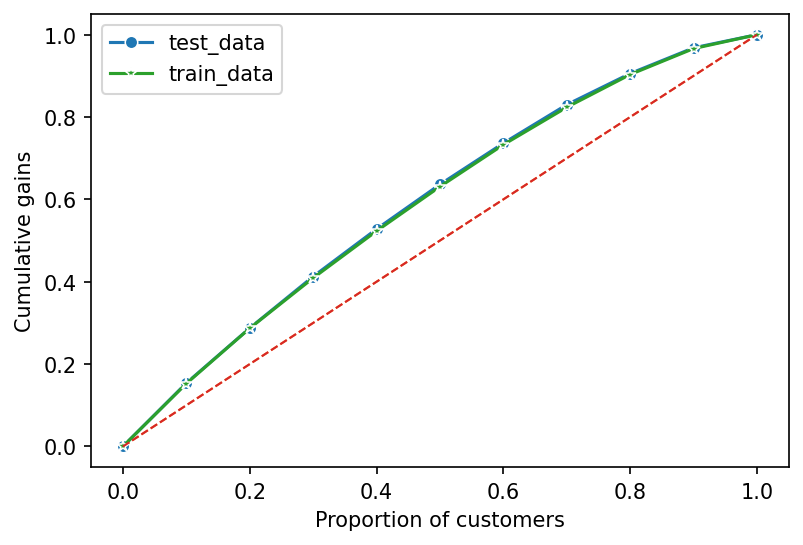

In [64]:
rsm.gains_plot(df=df_test,rvar='churn_yes',lev=1,pred='predictions',label='test_data')
rsm.gains_plot(df=df_train,rvar='churn_yes',lev=1,pred='predictions',label='train_data',marker='*')

In [ ]:
- 

## Question 2

Importance table

In [65]:
(
    rsm.or_ci(lr, importance=True, data=s_mobile[s_mobile.training == 1])
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

,index,OR,OR%,2.5%,97.5%,p.values,,dummy,importance,wmean,wstd,min,max
0,occupation[T.retired],0.186,-81.4%,0.168,0.207,< .001,***,True,5.372,0.137,0.344,0.0,1.0
1,highcreditr[T.yes],0.483,-51.7%,0.454,0.513,< .001,***,True,2.072,0.180,0.384,0.0,1.0
2,occupation[T.student],1.899,89.9%,1.788,2.018,< .001,***,True,1.899,0.055,0.227,0.0,1.0
3,eqpdays,1.829,82.9%,1.752,1.910,< .001,***,False,1.829,510.298,222.647,22.0,1982.0
4,overage,1.765,76.5%,1.692,1.841,< .001,***,False,1.765,61.625,67.964,0.0,283.0
5,region[T.SW],0.627,-37.3%,0.596,0.661,< .001,***,True,1.594,0.202,0.401,0.0,1.0
6,region[T.NE],0.645,-35.5%,0.612,0.679,< .001,***,True,1.551,0.199,0.399,0.0,1.0
7,region[T.SE],0.651,-34.9%,0.618,0.685,< .001,***,True,1.537,0.199,0.399,0.0,1.0
8,mou,0.656,-34.4%,0.616,0.699,< .001,***,False,1.524,543.775,546.068,0.0,7668.0
9,region[T.NW],0.661,-33.9%,0.627,0.695,< .001,***,True,1.514,0.199,0.399,0.0,1.0


## Plan 1

## Question 3

- eqpdays has large effect. So we can enter into contract with mobile phone companies with large market share and has a new model out so that we can market a deal where we offer the new phone  on installments and discounts on the data/call minutes plan.

## Question 4

In [67]:
lr_b = smf.glm(
    formula=form,
    family=Binomial(link=logit()),
    freq_weights=s_mobile.loc[s_mobile.training == 1, "cweight"],
    data=s_mobile[s_mobile.training == 1],
)

lr = lr_b.fit(cov_type="HC1")

In [68]:
s_mobile_copy = s_mobile[s_mobile.representative == 1].copy(deep = True)
s_mobile_copy['eqp_bin'] = pd.qcut(s_mobile_copy['eqpdays'],20)

s_mobile_copy.groupby(['eqp_bin'])['churn_yes'].mean()

eqp_bin
(12.999, 216.0]    0.009810
(216.0, 253.0]     0.007968
(253.0, 291.0]     0.013495
(291.0, 336.0]     0.013963
(336.0, 360.0]     0.010989
(360.0, 376.0]     0.014189
(376.0, 397.0]     0.015436
(397.0, 418.0]     0.020380
(418.0, 441.0]     0.009162
(441.0, 462.0]     0.020067
(462.0, 487.0]     0.036716
(487.0, 516.0]     0.025316
(516.0, 543.0]     0.027445
(543.0, 579.0]     0.017544
(579.0, 624.0]     0.027554
(624.0, 683.0]     0.029880
(683.0, 748.0]     0.026525
(748.0, 819.1]     0.028302
(819.1, 934.0]     0.017964
(934.0, 1786.0]    0.028056
Name: churn_yes, dtype: float64

In [69]:
# Estimated churn on representative sample

pred = lr.predict(s_mobile[s_mobile.representative == 1])

In [70]:
s_mobile['predictions'] = pred

In [71]:
# Mean monnthly churn rate for those above average churn in our data
churn = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].churn_yes.mean()

print(f'The mean monthly churn rate for those above average churn in the representative data is {round(churn*100,2)}%')

The mean monthly churn rate for those above average churn in the representative data is 2.51%


In [72]:
# Mean monthly churn rate after setting eqpdays to 0, assuming that only 70% of the target populaton will accept the offer

subset_preds = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].predictions.copy()
c = lr.predict(s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].sample(frac=0.7, random_state=42).assign(eqpdays=0))
subset_preds[c.index] = c

new_churn = subset_preds.mean()

print(f'The mean monthly churn rate for those above average churn in the representative data with eqpdays set to 0 is {round(new_churn*100,2)}%')

The mean monthly churn rate for those above average churn in the representative data with eqpdays set to 0 is 1.37%


In [73]:
print(f'The projected impact of our plan on churn is a reduction of {round((churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.14% for this subset of people


## Question 5

The plan will be targeted only at those customers who have a more than average probability of churning.

## Question 6

In [75]:
# Mean monnthly revenue for customers in this group
rev = s_mobile[(s_mobile.eqpdays>(1.5*365)) & (s_mobile.representative == 1)].revenue.mean()

In [76]:
ser_cost = 5

In [77]:
# Assuming that the incentive costs are 0.

clv_old = clv_calculator(rev,ser_cost,churn)
clv_old

1102.131548263913

In [78]:
clv_new = clv_calculator(rev,ser_cost,new_churn)
clv_new

1417.5590346245153

In [79]:
diff = clv_new - clv_old

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive today without incurring a loss')

We can spend atmost 315.43 SGD per customer for the incentive today without incurring a loss


In [80]:
# Present value of the installment plan

payment = np.repeat(999/12,12)
dis = np.arange(1,13,1)
mdr = ((1+0.1)**(1/12))-1
pv = payment/((1+mdr)**dis)

installment_value = pv.sum()
mobile_cost = 999

print(f'Offering the new mobile phone on the installment plan would cost us {round(mobile_cost - installment_value,2)} SGD per customer')
print('P.S: You can expect a phone to cost less when bought in bulk')

Offering the new mobile phone on the installment plan would cost us 49.91 SGD per customer
P.S: You can expect a phone to cost less when bought in bulk


In [81]:
# Finding maximum recurring incentive cost

inc_cost = []

for i in np.arange(1,20,0.001):
    clv = clv_old
    
    if abs(clv_calculator(rev,ser_cost,new_churn, inc_cost=i)-(mobile_cost - installment_value)-clv) < 0.02:
        inc_cost.append(i)

max_inc_cost = np.mean(inc_cost)

print(f'Maximum discount that we can offer per month per customer on this incentive plan is {round(max_inc_cost,2)} SGD')

Maximum discount that we can offer per month per customer on this incentive plan is 7.83 SGD


## Plan 2

## Question 3

- Change CS region to mimic SW region

## Question 4

In [82]:
# Mean monnthly churn rate for those above average churn in our data
churn = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].churn_yes.mean()

print(f'The mean monthly churn rate for those not in the SW region in the representative data is {round(churn*100,2)}%')

The mean monthly churn rate for those not in the SW region in the representative data is 2.83%


In [84]:
# Mean monthly churn rate after setting eqpdays to 0

new_churn = lr.predict(s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].assign(region='SW')).mean()

print(f'The mean monthly churn rate for those whose region has been simulated to look like the SW region in the representative data is {round(new_churn*100,2)}%')

The mean monthly churn rate for those whose region has been simulated to look like the SW region in the representative data is 1.73%


In [85]:
print(f'The projected impact of our plan on churn is a reduction of {round((churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.1% for this subset of people


## Question 5

- Plan will be targeted to customers in CS region

## Question 6

In [86]:
# Mean monnthly revenue for customers in this group
rev = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].revenue.mean()

In [87]:
ser_cost = 5

In [88]:
clv_old = clv_calculator(rev,ser_cost,churn)
clv_old

1261.9996971948126

In [89]:
clv_new = clv_calculator(rev,ser_cost,new_churn)
clv_new

1592.6300374326063

In [90]:
diff = clv_new - clv_old

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive today without incurring a loss')

We can spend atmost 330.63 SGD per customer for the incentive today without incurring a loss


- Installing extra towers in the CS region to mimic that of the SW region will have an initial set up cost. Each tower costs around 250000 SGD to install

In [91]:
target_perc = s_mobile.loc[(s_mobile.region == 'CS') & (s_mobile.representative == 1)].shape[0] / s_mobile.loc[s_mobile.representative == 1].shape[0]

In [92]:
max_spend = target_perc * 1000000 * diff

print(f'We have {round(max_spend,2)} SGD to spend on cell phone towers to expand the network in the CS region')

We have 65872584.79 SGD to spend on cell phone towers to expand the network in the CS region


In [93]:
# Present value of the land lease

payment = np.repeat(2000,60)
dis = np.arange(0,60,1)
mdr = ((1+0.1)**(1/12))-1
pv = payment/((1+mdr)**dis)

lease_value = pv.sum()

print(f'Leasing land will cost {round(lease_value,2)} SGD per tower')

Leasing land will cost 95835.16 SGD per tower
